In [1]:
import pandas as pd
from functools import reduce
from typing import Dict, List, Callable
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Callable, Any
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data from CSV file

In [3]:
def load_data(filepath: str):
    return pd.read_csv(filepath)

df = load_data('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Fill missing values with mean using reduce

In [5]:
def handle_missing_data(df: pd.DataFrame):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    def fill_column(accumulated_df: pd.DataFrame, col: str):
        mean_value = accumulated_df[col].mean()
        return accumulated_df.assign(**{col: accumulated_df[col].fillna(mean_value)})

    return reduce(fill_column, numeric_cols, df)

In [6]:
cleandData = handle_missing_data(df)
cleandData.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Standardize column names

In [7]:
def standardize_column_names(df: pd.DataFrame):
    def clean_column_name(col: str):
        return re.sub(
            r'_+', '_',
            re.sub(
                r'[^\w]+', '_',
                col.lower()
            ).strip('_')
        )

    cleaned_columns = list(map(clean_column_name, df.columns))
    return df.set_axis(cleaned_columns, axis=1)

In [8]:
newdf = standardize_column_names(cleandData)

In [9]:
newdf

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Standardize numerical column values (z-score)

In [14]:
def standardize_numerical_values(df: pd.DataFrame):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    standardized_cols = dict(
        map(
            lambda col: (col, (df[col] - df[col].mean()) / df[col].std()),
            numerical_cols
        )
    )
    return df.assign(**standardized_cols)

In [10]:
def standardize_numerical_precision(df: pd.DataFrame):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    standardized_cols = dict(
        map(
            lambda col: (col, df[col].round(2)),
            numerical_cols
        )
    )
    return df.assign(**standardized_cols)


In [11]:
stdData = standardize_numerical_precision(newdf)
stdData.head(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.28,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.26,33736494.0,17.2,17.3,0.48,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.52,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.70,327582.0,17.5,17.5,0.48,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.22,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.74,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.18,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.96,3696958.0,17.9,18.0,0.46,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.10,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.54,2978599.0,18.2,18.2,0.45,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.68,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.33,2883167.0,18.4,18.4,0.45,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.76,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.89,284331.0,18.6,18.7,0.43,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.87,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.36,2729431.0,18.8,18.9,0.43,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.91,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.84,26616792.0,19.0,19.1,0.42,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.17,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.56,2589345.0,19.2,19.3,0.40,8.1


# Filter rows based on condition

In [12]:
def filter_by_condition(
    df: pd.DataFrame,
    column: str = 'life_expectancy',
    condition: Callable[[Any], bool] = lambda x: x > 70
):
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    mask = df[column].map(condition)
    return df.loc[mask].copy()


In [13]:
cond = filter_by_condition(stdData , 'year', lambda  x : x==2015)
cond.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.28,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.26,33736494.00,17.2,17.3,0.48,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.98,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.23,28873.00,1.2,1.3,0.76,14.2
32,Algeria,2015,Developing,75.6,19.0,21,4.60,0.00,95.0,63,59.5,24,95.0,5.94,95.0,0.1,4132.76,39871528.00,6.0,5.8,0.74,14.4
48,Angola,2015,Developing,52.4,335.0,66,4.60,0.00,64.0,118,23.3,98,7.0,5.94,64.0,1.9,3695.79,2785935.00,8.3,8.2,0.53,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,4.60,0.00,99.0,0,47.7,0,86.0,5.94,99.0,0.2,13566.95,12753375.12,3.3,3.3,0.78,13.9


In [15]:
def compute_GDP_per_Capita(df: pd.DataFrame):
    return df.assign(gdp_per_capita=(df['gdp'] * 1000000/ df['population']))

In [16]:
dfnew = compute_GDP_per_Capita(newdf)
dfnew.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,gdp_per_capita
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,17.318314
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1870.360746
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,19.908962
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,181.218991
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,21.331247


# Aggregate data by country

In [17]:
def aggregate_by_country(df: pd.DataFrame):
    return df.groupby('country').agg({
        'life_expectancy': 'mean',
        'adult_mortality': 'mean',
        'infant_deaths': 'mean',
        'alcohol': 'mean',
        'bmi': 'mean',
        'population': 'mean',
        'schooling':'mean'
    }).reset_index()

In [18]:
agg = aggregate_by_country(newdf)
agg

,country,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,population,schooling
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,15.51875,9.972260e+06,8.21250
1,Albania,75.15625,45.0625,0.6875,4.848750,49.06875,6.969116e+05,12.13750
2,Algeria,73.61875,108.1875,20.3125,0.668929,48.74375,2.164983e+07,12.71250
3,Angola,49.01875,328.5625,83.7500,5.669554,18.01875,1.014710e+07,8.04375
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.740179,38.42500,1.275338e+07,8.84375
...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.243929,54.48750,1.275338e+07,12.78750
189,Viet Nam,74.77500,126.5625,29.1875,3.182054,11.18750,1.275338e+07,11.51250
190,Yemen,63.86250,211.8125,39.3750,0.332054,33.48750,1.275338e+07,8.50625
191,Zambia,53.90625,354.3125,33.4375,2.387054,17.45000,6.260246e+06,11.21250


# Compute statistical summaries

In [19]:
def compute_statistics(df: pd.DataFrame, column: str):
    values = df[column]
    return {
        'mean': values.mean(),
        'median': values.median(),
        'std': values.std(),
        'min': values.min(),
        'max': values.max()
    }

# Get top N records by column

In [20]:
def get_top_n(df: pd.DataFrame, column: str, n: int = 10):
    return df.nlargest(n, column).reset_index(drop=True)

In [22]:
l = get_top_n(newdf ,'life_expectancy' , 5)
l.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.000000,70,63.4,1,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
1,Finland,2014,Developing,89.0,78.0,0,8.80,6164.455402,80.940461,0,61.7,0,98.0,9.68,98.0,0.1,49914.61864,5461512.0,0.9,0.8,0.890,17.0
2,France,2008,Developing,89.0,88.0,3,11.90,7002.785925,47.000000,604,59.1,3,98.0,1.57,98.0,0.1,45413.65710,6437499.0,0.6,0.6,0.877,16.1
3,France,2007,Developing,89.0,89.0,3,12.20,64.737149,42.000000,39,58.6,3,99.0,1.45,98.0,0.1,416.58397,6416229.0,0.6,0.6,0.873,16.1
4,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.000000,443,61.9,3,94.0,11.30,95.0,0.1,4792.65288,89825.0,1.1,1.1,0.920,17.0


# Save processed data to CSV

In [23]:
def save_results(df: pd.DataFrame, filepath: str):
    df.to_csv(filepath, index=False)
    return filepath

# Recursive function to print dictionary

In [24]:
def print_dict_recursive(data: Dict, keys: List = None, index: int = 0):
    if keys is None:
        keys = list(data.keys())

    if index >= len(keys):
        return

    key = keys[index]
    value = data[key]
    print(f"  {key}: {value:.2f}")
    print_dict_recursive(data, keys, index + 1)

# Recursive function to print dataframe rows

In [25]:
def print_dataframe_recursive(df: pd.DataFrame, index: int = 0):
    if index >= len(df):
        return

    row = df.iloc[index]
    print(f"  {row['country']}: {row['life_expectancy']:.2f} years")
    print_dataframe_recursive(df, index + 1)

# Visualize missing data patterns

In [26]:
def visualize_missing_data(df: pd.DataFrame, title: str = "Missing Data"):
    plt.figure(figsize=(12, 6))
    missing_data = df.isnull().sum().sort_values(ascending=False)
    # missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    # if len(missing_data) > 0:
    missing_data.plot(kind='bar', color='coral')
    plt.title(f'{title} - Missing Values Count')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # else:
    #     print(f"{title}: No missing values!")

# Visualize top N countries

In [27]:
def visualize_top_countries(df: pd.DataFrame, column: str = 'life_expectancy',n: int = 10, title: str = ""):
    top_data = get_top_n(df , column , n)
    plt.figure(figsize=(12, 6))
    plt.barh(top_data['country'], top_data[column], color='steelblue')
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Country')
    plt.title(f'{title} - Top {n} Countries by {column.replace("_", " ").title()}')
    plt.xticks(range(0, 101, 5))

    # Optional: Set x-axis limits based on data range
    plt.xlim(0, max(100, top_data[column].max() + 5))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## Visualize distribution of a column

In [28]:
def visualize_distribution(df: pd.DataFrame, column: str, title: str = ""):
    plt.figure(figsize=(10, 6))
    # Histogram only
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{title} - {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.axvline(df[column].mean(), color='red', linestyle='--',
                label=f'Mean: {df[column].mean():.2f}')
    plt.axvline(df[column].median(), color='green', linestyle='--',
                label=f'Median: {df[column].median():.2f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Higher-order function: Compose multiple functions into one

In [30]:
def compose(*functions):
    return reduce(lambda f, g: lambda x: g(f(x)), functions)

In [31]:
def composeTow(g , f):
    return lambda f, g: lambda x: g(f(x))

# Main Program

In [32]:
def process_life_expectancy_data(filepath: str) :

    # Step 1: Load data
    df = load_data(filepath)
    print(f"Loaded {len(df)} records\n\n")
    print(df.head())
    # Visualize original data before any processing
    visualize_missing_data(df, "Original Data")
    visualize_distribution(df, 'Life expectancy ', "Original Data")

    # Step 2: Create data cleaning pipeline using composition
    cleaning_pipeline = compose(
        handle_missing_data,
        standardize_column_names,
        standardize_numerical_precision
    )

    cleaned_df = cleaning_pipeline(df)
    print(cleaned_df.head())
    #print_dataframe_recursive(cleaned_df)
    print("Data cleaned\n\n")
    # Visualize cleaned data
    visualize_missing_data(cleaned_df, "Cleaned Data")
    #standradizes numerical data
    standardized_numerical_df = standardize_numerical_values(cleandData)
    print("standardized numerical columns\n")
    print(standardized_numerical_df.head())
    # Step 3: Create transformation
    col ='Year'
    condition = lambda x: x == 2014
    condition_desc = "== 2014"
    # Filter based on condition
    transformed_df_filter= filter_by_condition(df , col , condition)
    print(f"\nFiltered to {len(transformed_df_filter)} records with {col} {condition_desc}")
    print(transformed_df_filter.head())
    #compute new column
    print(f"\nNew Column added Gdp PER Capita\n")
    computed_gdp_per_capita_df = compute_GDP_per_Capita(cleaned_df)
    print(computed_gdp_per_capita_df.head())

    # Aggregate by country
    print(f"\nAggregate by country\n")
    country_stats = aggregate_by_country(cleaned_df)
    print(country_stats.head(10))

    # Step 4: Compute statistics
    life_exp_stats = compute_statistics(cleaned_df, 'bmi')

    print("\nBmi Expectancy Statistics:")
    print_dict_recursive(life_exp_stats)

    # Step 5: Get top 10 countries
    top_countries = get_top_n(cleaned_df , 'life_expectancy', 10)

    print("\nTop 10 Countries by Life Expectancy:")

    print_dataframe_recursive(top_countries)
    visualize_top_countries(top_countries, 'life_expectancy', 10, "Top 10 Countries")

    # Step 6: Save results (side effect isolated to end)
    output_path = save_results(country_stats, 'processed_life_expectancy_functional.csv')
    print(f"\nResults saved to {output_path}")

    # Return immutable result
    return {
        'statistics': life_exp_stats,
        'top_countries': top_countries,
        'total_countries': len(country_stats),
        'filtered_data': transformed_df_filter
    }

Loaded 2938 records


       Country  Year      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
0  Afghanistan  2015  Developing              65.0            263.0             62     0.01               71.279624         65.0      1154   19.1                  83    6.0               8.16         65.0        0.1  584.259210  33736494.0                   17.2                 17.3                            0.479       10.1
1  Afghanistan  2014  Developing              59.9            271.0             64     0.01               73.523582         62.0       492   18.6                  86   58.0               8.18         62.0        0.1  612.696514    327582.0                   17.5                 17.5                            0.476      

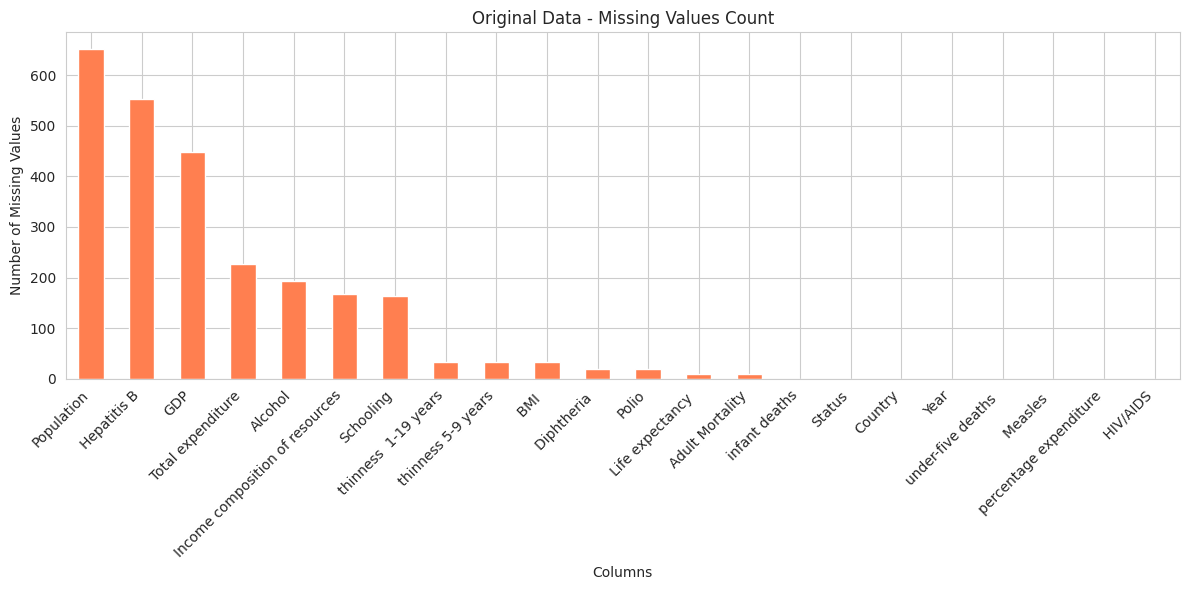

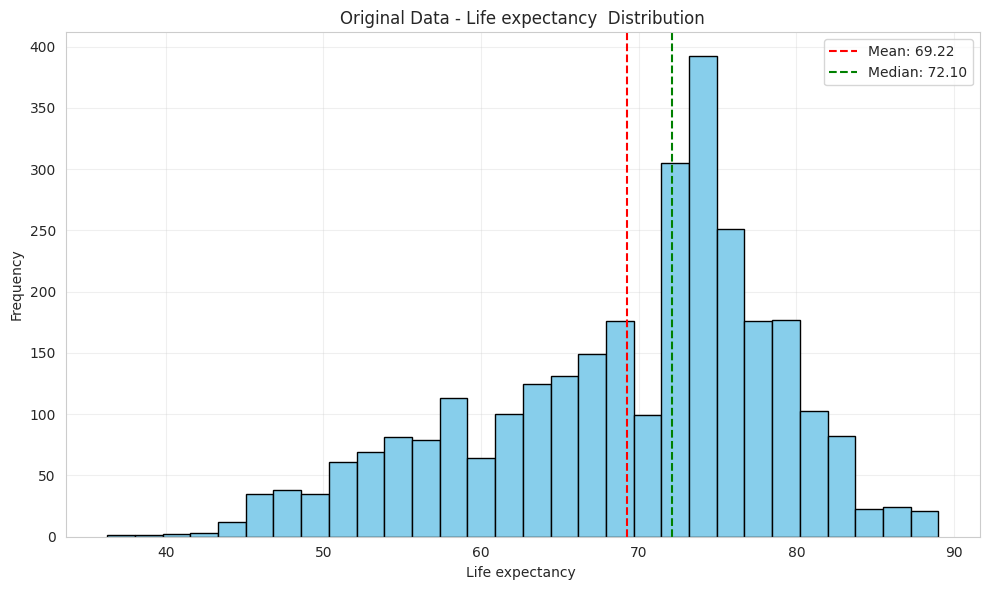

       country  year      status  life_expectancy  adult_mortality  infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles   bmi  under_five_deaths  polio  total_expenditure  diphtheria  hiv_aids     gdp  population  thinness_1_19_years  thinness_5_9_years  income_composition_of_resources  schooling
0  Afghanistan  2015  Developing             65.0            263.0             62     0.01                   71.28         65.0     1154  19.1                 83    6.0               8.16        65.0       0.1  584.26  33736494.0                 17.2                17.3                             0.48       10.1
1  Afghanistan  2014  Developing             59.9            271.0             64     0.01                   73.52         62.0      492  18.6                 86   58.0               8.18        62.0       0.1  612.70    327582.0                 17.5                17.5                             0.48       10.0
2  Afghanistan  2013  Developing             59.9      

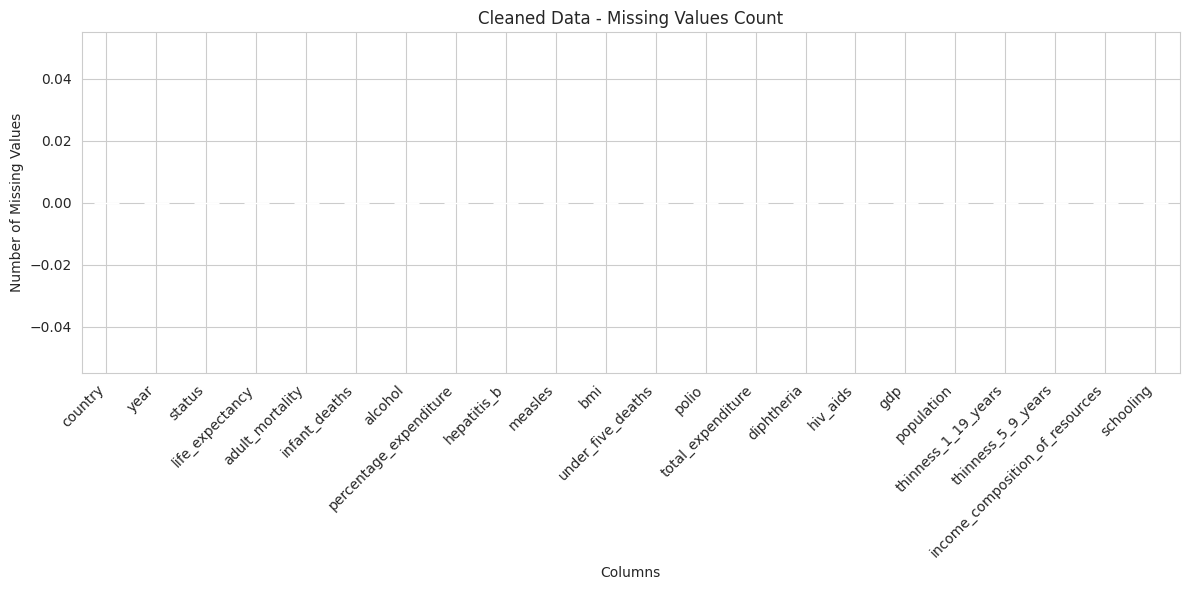

standardized numerical columns

       Country      Year      Status  Life expectancy   Adult Mortality  infant deaths   Alcohol  percentage expenditure  Hepatitis B  Measles       BMI   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
0  Afghanistan  1.621486  Developing         -0.444372         0.791452       0.268778 -1.172759               -0.335513    -0.705741 -0.110366 -0.964550            0.255316 -3.278080           0.925649    -0.732827   -0.32339 -0.525158    0.389909               2.812651             2.772807                        -0.725277  -0.579832
1  Afghanistan  1.404747  Developing         -0.980783         0.855926       0.285738 -1.172759               -0.334384    -0.838561 -0.168095 -0.989641            0.274014 -1.051303           0.933981    -0.859730   -0.32339 -0.522994   -0.230896               2.880918             2.817423  

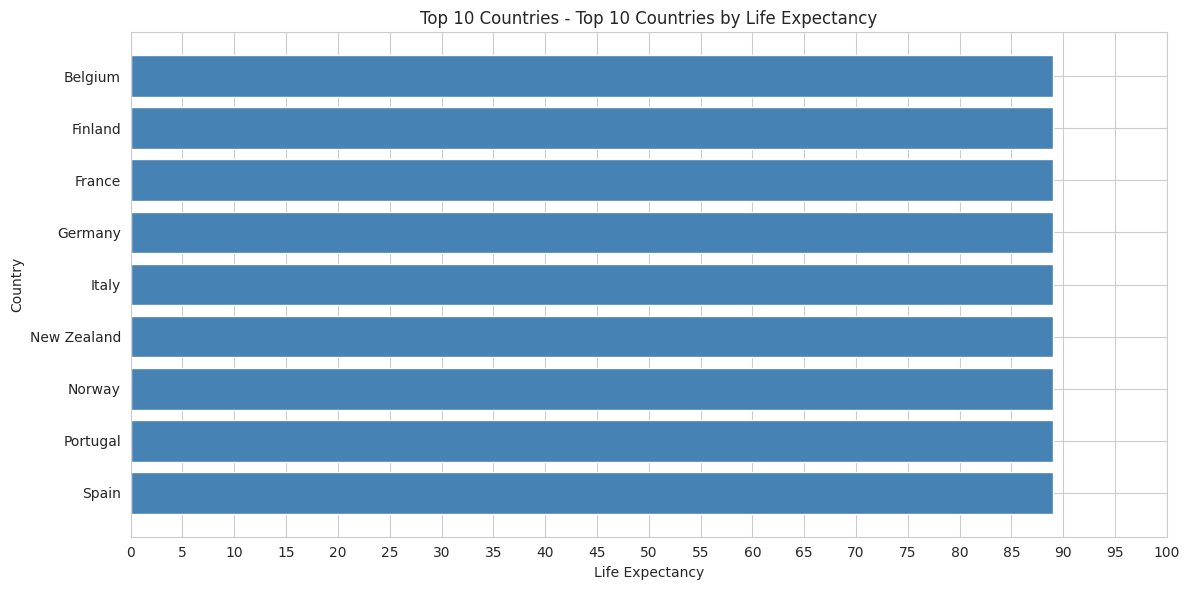


Results saved to processed_life_expectancy_functional.csv

Functional processing complete!


In [33]:
results = process_life_expectancy_data('/content/Life Expectancy Data.csv')
print("\nFunctional processing complete!")

In [34]:
def compute_correlations(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    columns = list(numeric_df.columns)

    corr_pair = lambda c1, c2: round(numeric_df[c1].corr(numeric_df[c2]), 2)

    build_row = lambda c1: list(map(lambda c2: corr_pair(c1, c2), columns))

    matrix = list(map(build_row, columns))

    return pd.DataFrame(matrix, columns=columns, index=columns)


In [35]:
conv = compute_correlations(newdf)
conv

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1.00,0.17,-0.08,-0.04,-0.05,0.03,0.09,-0.08,0.11,-0.04,0.09,0.08,0.13,-0.14,0.09,0.01,-0.05,-0.05,0.24,0.20
life_expectancy,0.17,1.00,-0.70,-0.20,0.39,0.38,0.20,-0.16,0.56,-0.22,0.46,0.21,0.48,-0.56,0.43,-0.02,-0.47,-0.47,0.69,0.72
adult_mortality,-0.08,-0.70,1.00,0.08,-0.19,-0.24,-0.14,0.03,-0.38,0.09,-0.27,-0.11,-0.27,0.52,-0.28,-0.01,0.30,0.31,-0.44,-0.44
infant_deaths,-0.04,-0.20,0.08,1.00,-0.11,-0.09,-0.18,0.50,-0.23,1.00,-0.17,-0.13,-0.18,0.03,-0.11,0.55,0.47,0.47,-0.14,-0.19
alcohol,-0.05,0.39,-0.19,-0.11,1.00,0.34,0.08,-0.05,0.32,-0.11,0.21,0.29,0.22,-0.05,0.32,-0.03,-0.42,-0.41,0.42,0.50
percentage_expenditure,0.03,0.38,-0.24,-0.09,0.34,1.00,0.01,-0.06,0.23,-0.09,0.15,0.17,0.14,-0.10,0.89,-0.02,-0.25,-0.25,0.38,0.39
hepatitis_b,0.09,0.20,-0.14,-0.18,0.08,0.01,1.00,-0.09,0.13,-0.18,0.41,0.05,0.50,-0.10,0.06,-0.11,-0.11,-0.11,0.15,0.17
measles,-0.08,-0.16,0.03,0.50,-0.05,-0.06,-0.09,1.00,-0.18,0.51,-0.14,-0.10,-0.14,0.03,-0.07,0.24,0.22,0.22,-0.12,-0.12
bmi,0.11,0.56,-0.38,-0.23,0.32,0.23,0.13,-0.18,1.00,-0.24,0.28,0.23,0.28,-0.24,0.28,-0.06,-0.53,-0.54,0.48,0.51
under_five_deaths,-0.04,-0.22,0.09,1.00,-0.11,-0.09,-0.18,0.51,-0.24,1.00,-0.19,-0.13,-0.20,0.04,-0.11,0.54,0.47,0.47,-0.16,-0.21
